# Customer Churn Prediction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## 1. Data Loading

In [2]:
df = pd.read_csv("C:\working office\customer_churn_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\aryam\AppData\Local\Temp\ipykernel_24864\167444355.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("C:\working office\customer_churn_data.csv")


## 2. Data Cleaning

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df[df["InternetService"].isnull()]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
12,13,47,Male,2,63.26,Two-Year,NaN,126.52,No,Yes
13,14,25,Female,8,71.78,One-Year,NaN,574.24,No,Yes
...,...,...,...,...,...,...,...,...,...,...
990,991,47,Female,9,108.47,Two-Year,NaN,976.23,No,Yes
992,993,42,Female,46,61.09,Month-to-Month,NaN,2810.14,No,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [7]:
df["InternetService"].fillna("Other",inplace = True)

C:\Users\aryam\AppData\Local\Temp\ipykernel_24864\2849866868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["InternetService"].fillna("Other",inplace = True)


In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Other,2208.32,No,Yes


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df = df[df["TotalCharges"]>0]

In [11]:
df["ContractType"].value_counts()

ContractType
Month-to-Month    487
One-Year          277
Two-Year          185
Name: count, dtype: int64

In [12]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,949.000000,949.000000,949.000000,949.000000,949.000000
mean,502.596417,44.654373,19.992624,74.226628,1479.835680
std,289.479069,9.751157,18.860664,25.718576,1578.452578
min,1.000000,12.000000,1.000000,30.000000,30.060000
25%,252.000000,38.000000,6.000000,51.910000,408.400000
50%,503.000000,45.000000,14.000000,73.910000,941.080000
75%,753.000000,51.000000,28.000000,95.720000,2005.740000
max,1000.000000,83.000000,122.000000,119.960000,12416.250000


<Axes: >

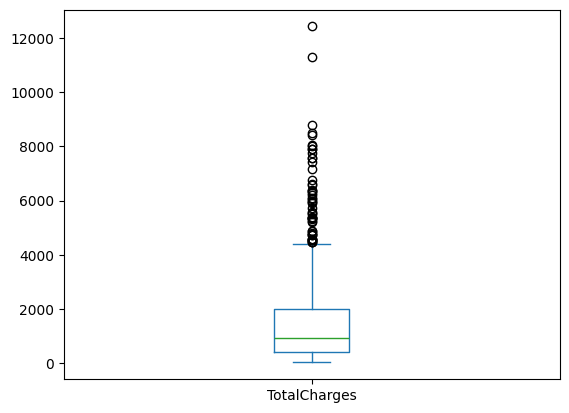

In [13]:
df["TotalCharges"].plot(kind = "box")

## 3. Exploratory Data Analysis

<Axes: xlabel='Churn'>

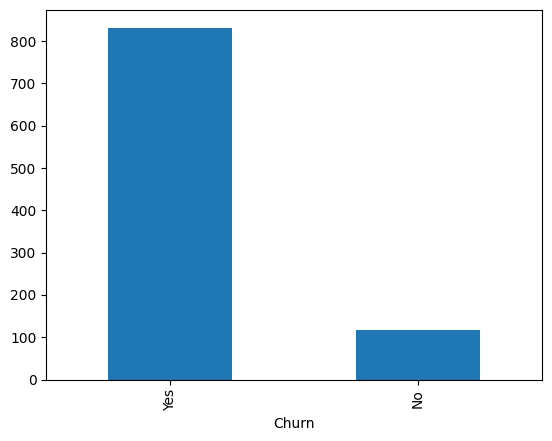

In [14]:
df["Churn"].value_counts().plot(kind = "bar")


<Axes: xlabel='TechSupport'>

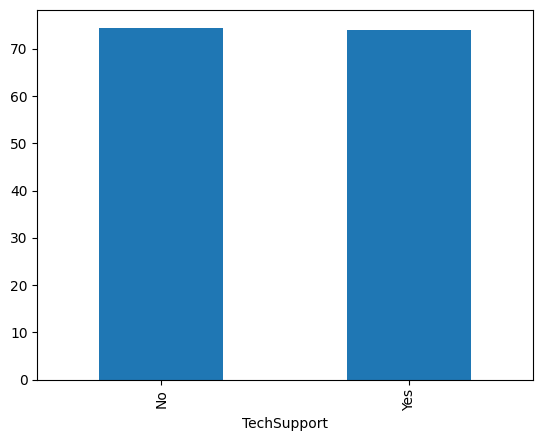

In [15]:
df.groupby("TechSupport")["MonthlyCharges"].mean().plot(kind = "bar")

In [16]:
df.groupby("TechSupport")["TotalCharges"].mean().round(2)

TechSupport
No     1557.27
Yes    1403.86
Name: TotalCharges, dtype: float64

<Axes: xlabel='InternetService'>

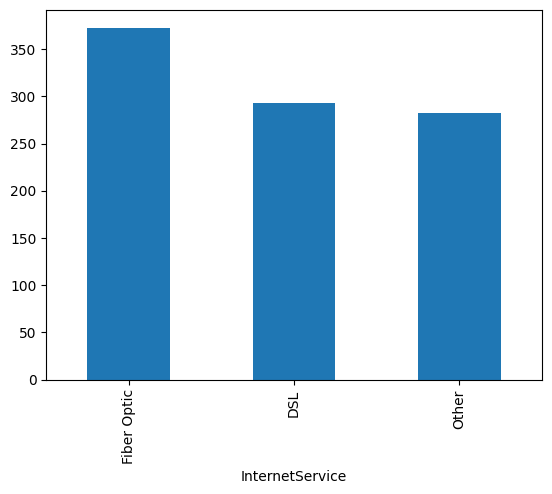

In [17]:
df["InternetService"].value_counts().plot(kind = "bar")

In [18]:
df[df["TechSupport"] == "Yes"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
988,989,42,Male,12,79.71,Month-to-Month,DSL,956.52,Yes,Yes
989,990,45,Male,1,83.57,One-Year,Fiber Optic,83.57,Yes,Yes
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


In [19]:
df[df["TechSupport"] == "No"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
4,5,42,Male,32,69.01,Month-to-Month,Other,2208.32,No,Yes
6,7,60,Male,14,80.32,One-Year,Other,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,Other,353.40,No,Yes
12,13,47,Male,2,63.26,Two-Year,Other,126.52,No,Yes
...,...,...,...,...,...,...,...,...,...,...
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
996,997,62,Male,9,80.93,Month-to-Month,Other,728.37,No,Yes
998,999,39,Male,68,65.67,One-Year,Other,4465.56,No,Yes


<Axes: xlabel='InternetService'>

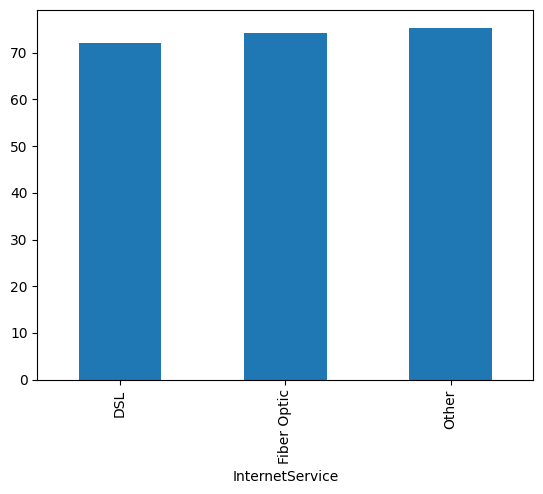

In [20]:
no = df[df["TechSupport"] == "No"]
no.groupby("InternetService")["MonthlyCharges"].mean().plot(kind = "bar")


<Axes: xlabel='InternetService'>

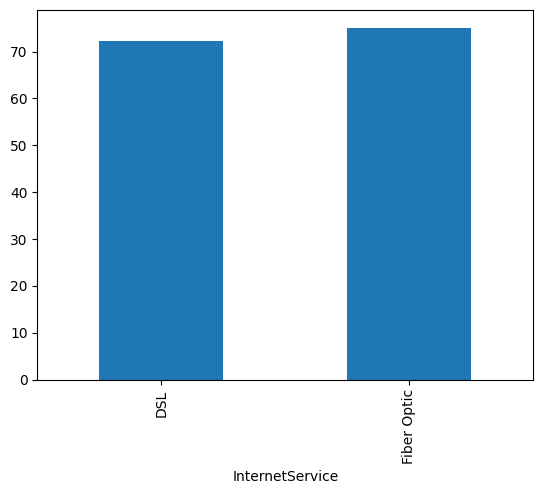

In [21]:
no = df[df["TechSupport"] == "Yes"]
no.groupby("InternetService")["MonthlyCharges"].mean().plot(kind = "bar")

<Axes: xlabel='Gender,Churn'>

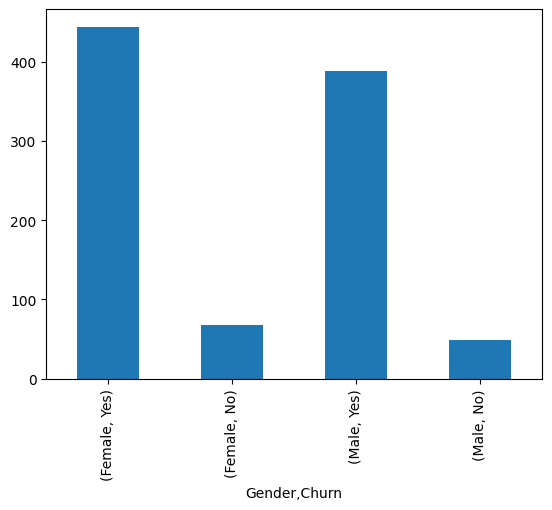

In [22]:
df.groupby("Gender")["Churn"].value_counts().plot(kind = "bar")

<Axes: xlabel='Age'>

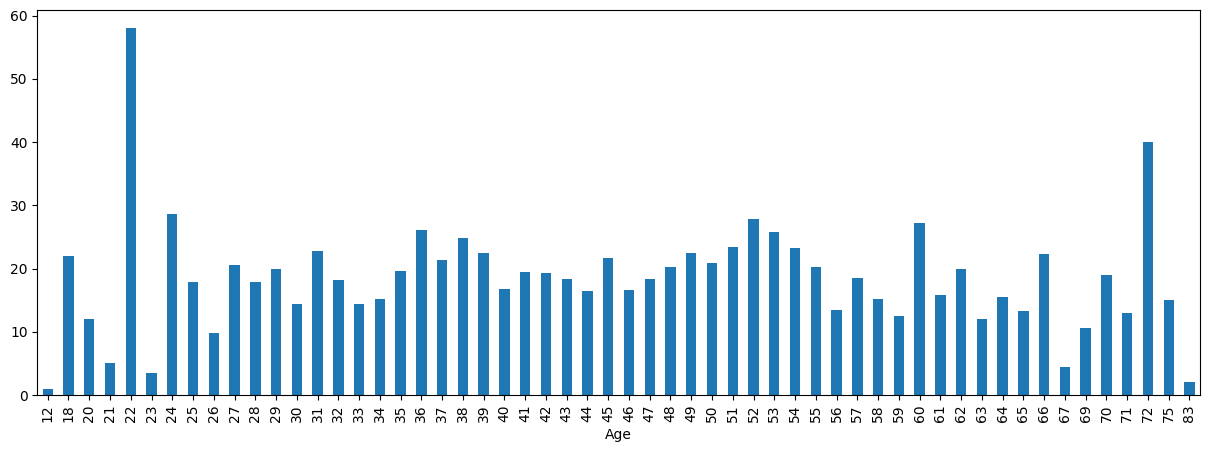

In [23]:
#age and tenure
df.groupby("Age")["Tenure"].mean().plot(kind = "bar", figsize = (15,5))

<Axes: xlabel='Age'>

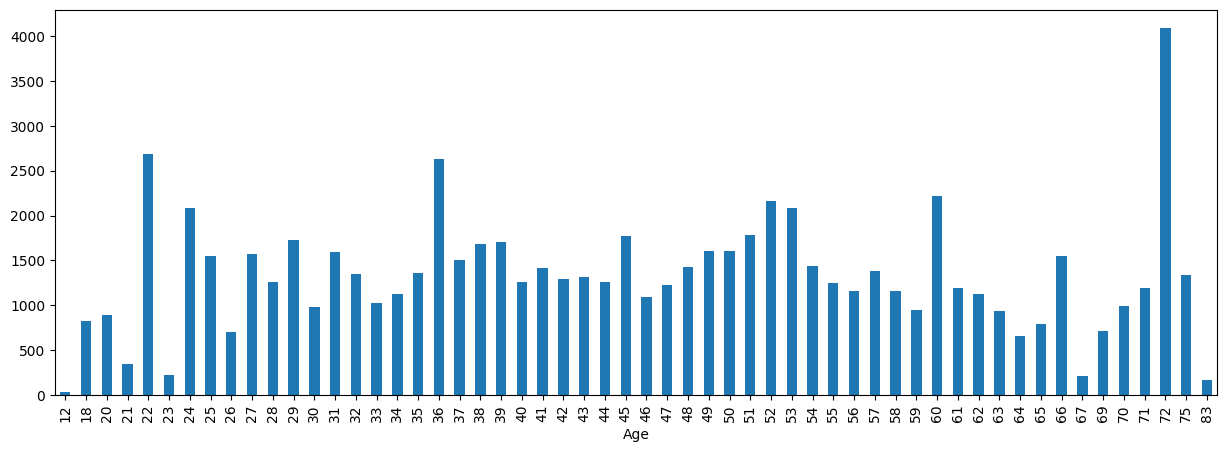

In [24]:
df.groupby("Age")["TotalCharges"].mean().plot(kind = "bar", figsize = (15,5))

## 4. Model Building and  Evaluation


In [25]:
x = df.drop(["CustomerID","Churn"],axis = 1)
y = df["Churn"]

In [26]:
#one hot encoding for both x and y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = x.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
y = le.fit_transform(y)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 100 , random_state = 42, max_depth = 5)
cv = cross_val_score(rf, x_train, y_train,cv = 5,scoring = "accuracy")
print("Cross validation scores: ", cv)
print("Mean cross validation score: ", cv.mean())


Cross validation scores:  [1.         0.99342105 0.99342105 0.99342105 0.99337748]
Mean cross validation score:  0.9947281282676892


In [29]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       166

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190

Confusion Matrix: 
 [[ 24   0]
 [  0 166]]
Accuracy Score:  1.0


In [30]:
import numpy as np

y_shuffled = np.random.permutation(y_train)
rf.fit(x_train, y_shuffled)
print(rf.score(x_test, y_test))



0.8736842105263158


In [31]:
test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})


## 5. Deployment

In [ ]:

import joblib
joblib.dump(rf, "churn_model.pkl")

['churn_model.pkl']